# Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                                    random_state = 0)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [114]:
training_accuracy = []
test_accuracy = []
Depths = range(1,6)

for D in Depths:
    tree = DecisionTreeClassifier(max_depth = D,random_state = 0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train,y_train))
    test_accuracy.append(tree.score(X_test,y_test))

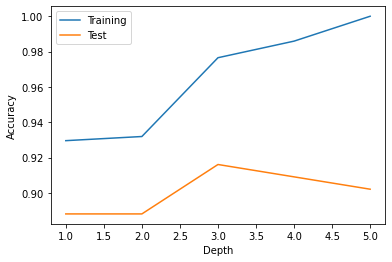

In [115]:
plt.plot(Depths, training_accuracy, label = "Training")
plt.plot(Depths, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

In [119]:
from sklearn.tree import export_graphviz
tree = DecisionTreeClassifier(max_depth = 3,random_state = 0)
tree.fit(X_train,y_train)
export_graphviz(tree, out_file = "tree.dot", class_names=["maligant","benign"], 
                feature_names = cancer.feature_names, impurity = False, filled = True)

In [125]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

An measure in the decision tree is the i portance of the feature. So we can see which feature is mostly and which is not used at all in the tree:

In [126]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01069388, 0.        , 0.01090021, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04022023, 0.03226776, 0.79120523, 0.        , 0.        ,
       0.        , 0.        , 0.11471269, 0.        , 0.        ])

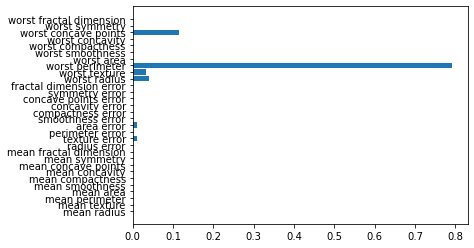

In [127]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align ='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(tree)   

# Random Forest

Multiple independent decision trees.

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,
                                                    random_state = 0)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)

forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

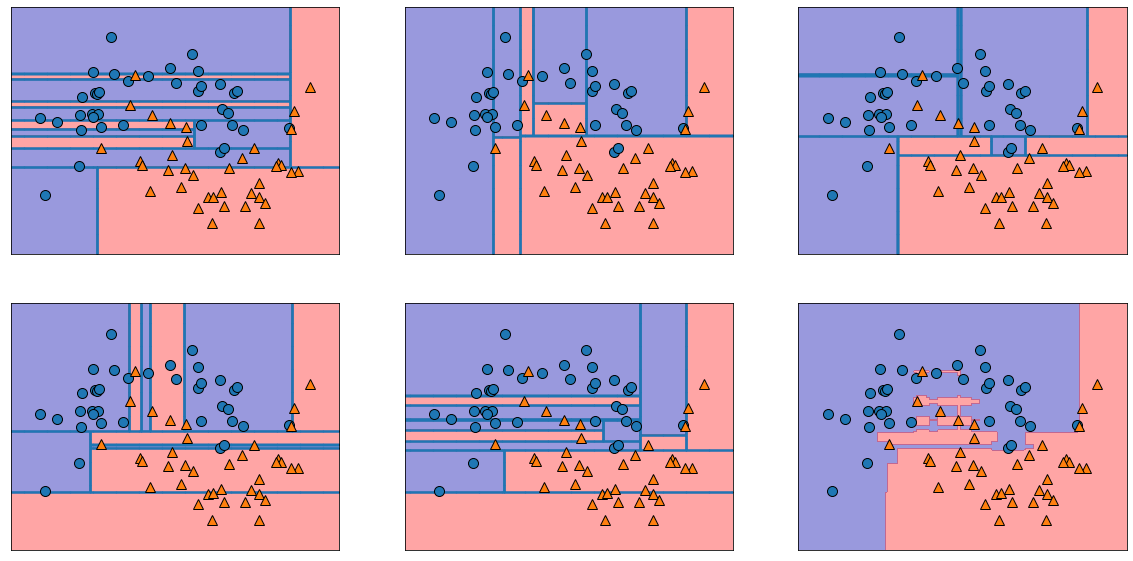

In [139]:
fig, axes = plt.subplots(2,3,figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    mglearn.plots.plot_tree_partition(X_train,y_train, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax = axes[-1,-1], alpha = .4)  
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)

We can adjust the number of trees in a forest:

In [142]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                                    random_state = 0)

training_accuracy = []
test_accuracy = []
Number_trees = range(1,50)

for NT in Number_trees:
    forest = RandomForestClassifier(n_estimators = NT, random_state = 0)
    forest.fit(X_train,y_train)
    training_accuracy.append(forest.score(X_train,y_train))
    test_accuracy.append(forest.score(X_test,y_test))


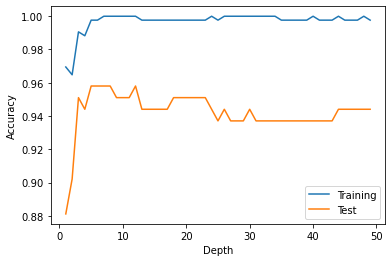

In [143]:
plt.plot(Number_trees, training_accuracy, label = "Training")
plt.plot(Number_trees, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

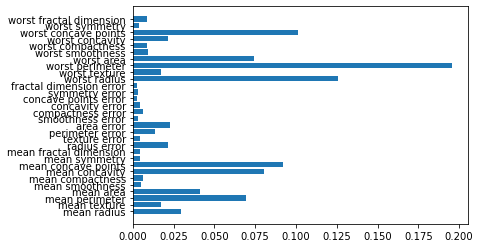

In [145]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train,y_train)

plot_feature_importances_cancer(forest)

# Regression-Trees  with Gradient Boosting (Gradient Boosting Machines)

Used for regression and classification

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                                    random_state = 0)


gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

We can djust the depth of the trees:

In [147]:
training_accuracy = []
test_accuracy = []
Depth_trees = range(1,50)

for NT in Depth_trees:
    gbrt = GradientBoostingClassifier(max_depth = NT,random_state = 0)
    gbrt.fit(X_train,y_train)
    training_accuracy.append(gbrt.score(X_train,y_train))
    test_accuracy.append(gbrt.score(X_test,y_test))

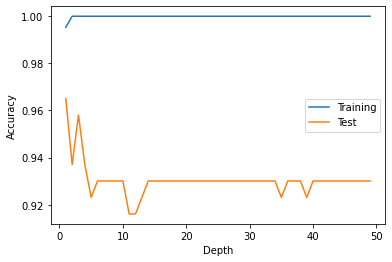

In [149]:
plt.plot(Depth_trees, training_accuracy, label = "Training")
plt.plot(Depth_trees, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

We can djust the learning rate (how strong does every forest try to improve from the one before):

In [160]:
training_accuracy = []
test_accuracy = []
LR = np.arange(100)/100+0.001

for NT in LR:
    gbrt = GradientBoostingClassifier(learning_rate = NT,random_state = 0)
    gbrt.fit(X_train,y_train)
    training_accuracy.append(gbrt.score(X_train,y_train))
    test_accuracy.append(gbrt.score(X_test,y_test))

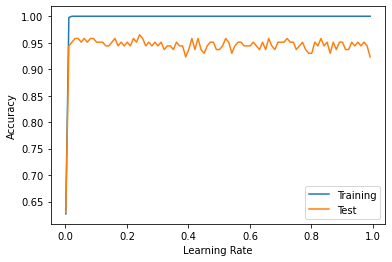

In [161]:
plt.plot(LR, training_accuracy, label = "Training")
plt.plot(LR, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.legend()

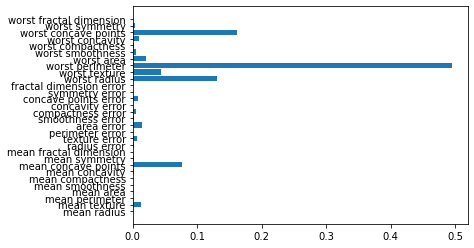

In [162]:
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)